## AWS Data Processing

##### Author: Alex Sherman | alsherman@deloitte.com


##### Agenda
- S3
- Lambda
- IAM
- CloudWatch
- DynamoDB 
- API Gateway

In [18]:
import os
import boto3
from IPython.core.display import display, HTML
from IPython.display import Image
from configparser import ConfigParser, ExtendedInterpolation

In [19]:
config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('lambda_exercise_1/config.ini')
BUCKET_NAME = config['LAMBDA']['BUCKET_NAME']
BASE_URL = config['LAMBDA']['BASE_URL']
COMPANY = config['LAMBDA']['COMPANY']

print('Bucket name: {}\nBase url: {}\nCompany: {}'.format(
    BUCKET_NAME, BASE_URL, COMPANY))

Bucket name: guild-annual-report
Base url: http://www.annualreports.com
Company: southwest-airlines-co


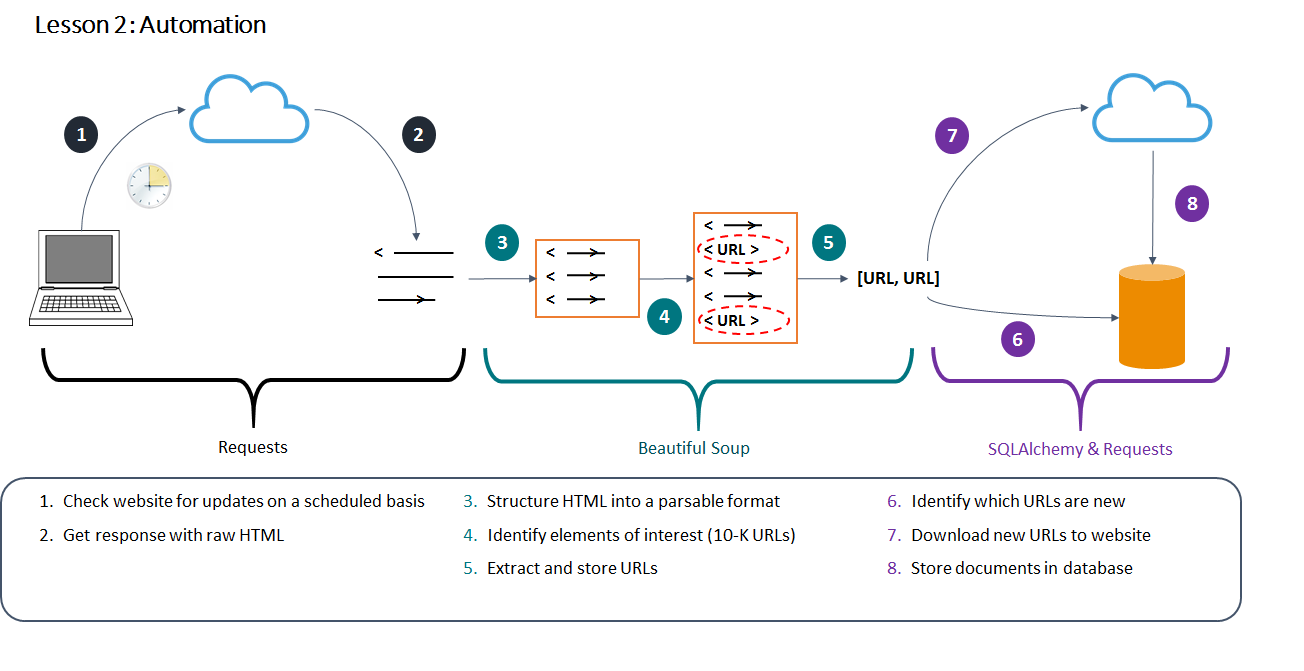

In [9]:
# process to automate with AWS
Image("../../raw_data/images/lesson2_automation.png", width=600, height=400)

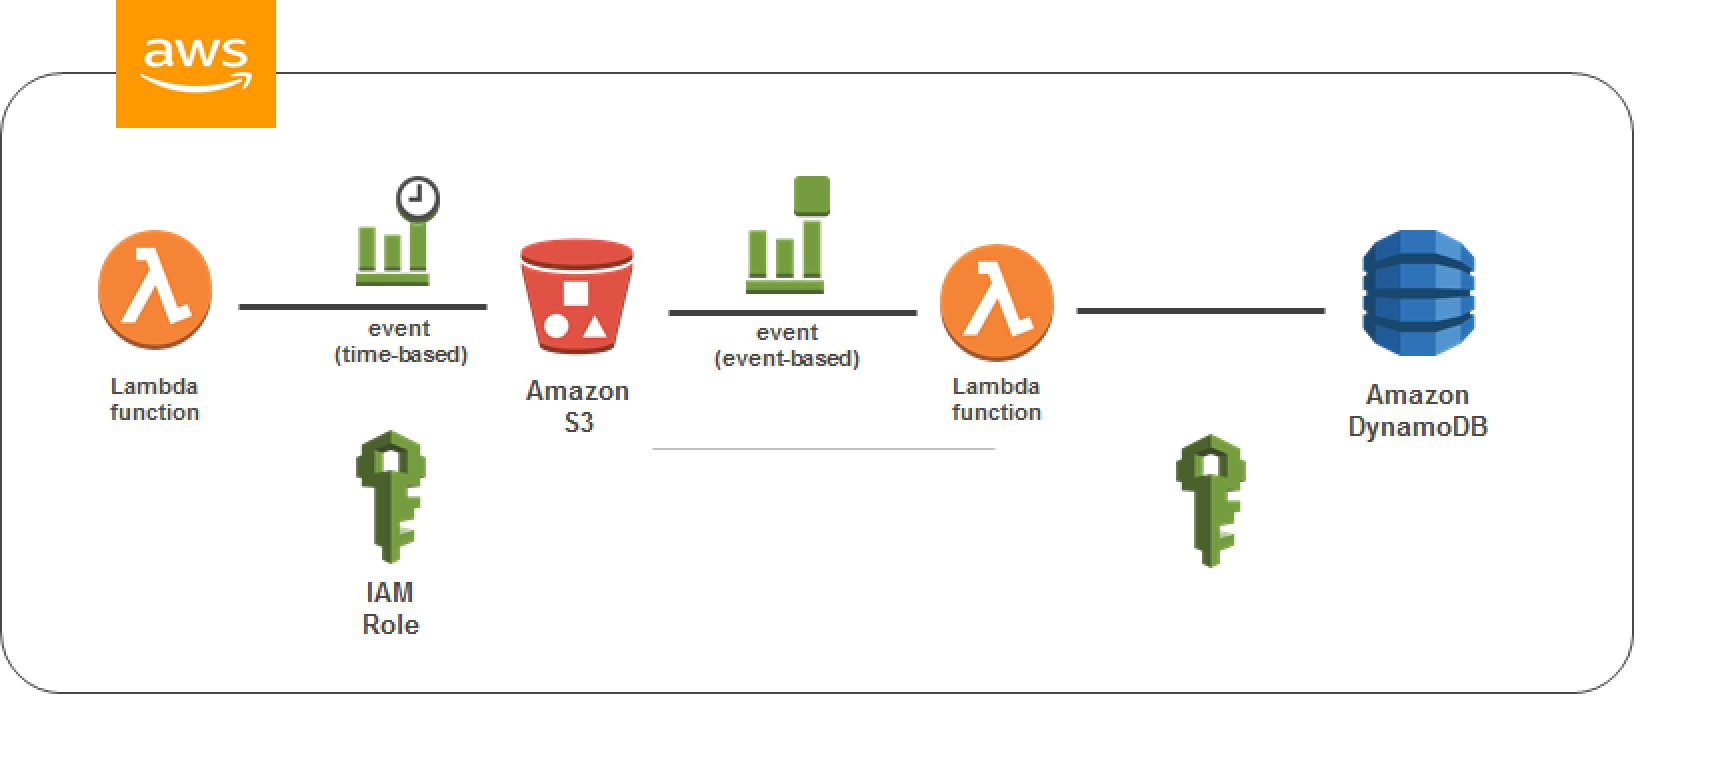

In [11]:
# AWS process
Image("../../raw_data/images/aws_process.png", width=700, height=400)

### Boto3

Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python, which allows Python developers to write software that makes use of services like Amazon S3 and Amazon EC2. 

##### Installation:
    conda install -c anaconda boto3 

##### Next, set up credentials and a region (in e.g. ~/.aws/credentials)

    [default]
    aws_access_key_id = YOUR_KEY
    aws_secret_access_key = YOUR_SECRET
    region=us-east-1

##### Then, from a Python interpreter, test boto3:
    # check for all S3 buckets in your AWS account
    >>> import boto3
    >>> s3 = boto3.resource('s3')
    >>> for bucket in s3.buckets.all():
            print(bucket.name)

In [12]:
aws_boto3_url = 'http://boto3.readthedocs.io/en/latest/guide/configuration.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_boto3_url)
HTML(iframe)

### AWS S3

Amazon S3 is object storage built to store and retrieve any amount of data from anywhere – web sites and mobile apps, corporate applications, and data from IoT sensors or devices. 

It is designed to deliver 99.999999999% durability, and stores data for millions of applications used by market leaders in every industry. S3 provides comprehensive security and compliance capabilities that meet even the most stringent regulatory requirements. It gives customers flexibility in the way they manage data for cost optimization, access control, and compliance. 

S3 provides query-in-place functionality, allowing you to run powerful analytics directly on your data at rest in S3. And Amazon S3 is the most supported cloud storage service available, with integration from the largest community of third-party solutions, systems integrator partners, and other AWS services.

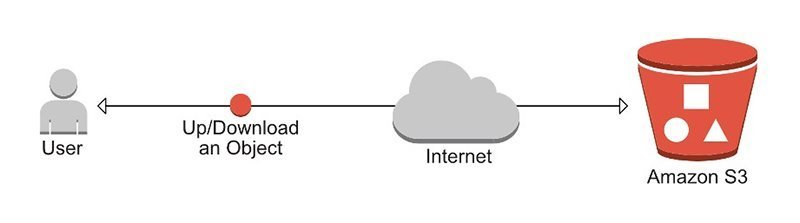

In [14]:
# S3 upload/download process
Image("../../raw_data/images/S3_bucket_process.jpg", width=800, height=400)

In [48]:
aws_s3_url = 'http://boto3.readthedocs.io/en/latest/guide/migrations3.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_s3_url)
HTML(iframe)

In [12]:
import boto3
s3 = boto3.resource('s3')

In [13]:
# observe to available functionality for s3 via boto3
print(dir(s3))

['Bucket', 'BucketAcl', 'BucketCors', 'BucketLifecycle', 'BucketLifecycleConfiguration', 'BucketLogging', 'BucketNotification', 'BucketPolicy', 'BucketRequestPayment', 'BucketTagging', 'BucketVersioning', 'BucketWebsite', 'MultipartUpload', 'MultipartUploadPart', 'Object', 'ObjectAcl', 'ObjectSummary', 'ObjectVersion', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'buckets', 'create_bucket', 'get_available_subresources', 'meta']


In [14]:
s3.create_bucket(
    Bucket='guild-annual-report',  # bucket name
    ACL='public-read-write'        # bucket permissions
)

s3.Bucket(name='guild-annual-report')

In [22]:
# view the s3 bucket to connect
BUCKET_NAME

'guild-annual-report'

In [20]:
# connect to a s3 bucket
bucket = s3.Bucket(BUCKET_NAME)

In [23]:
# observe to available functionality for a s3 bucket via boto3
print(dir(bucket))

['Acl', 'Cors', 'Lifecycle', 'LifecycleConfiguration', 'Logging', 'Notification', 'Object', 'Policy', 'RequestPayment', 'Tagging', 'Versioning', 'Website', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_name', 'copy', 'create', 'creation_date', 'delete', 'delete_objects', 'download_file', 'download_fileobj', 'get_available_subresources', 'load', 'meta', 'multipart_uploads', 'name', 'object_versions', 'objects', 'put_object', 'upload_file', 'upload_fileobj', 'wait_until_exists', 'wait_until_not_exists']


In [25]:
# put object in s3 bucket
bucket.put_object(Body='Example Text', Bucket=BUCKET_NAME, Key='delete.txt')

s3.Object(bucket_name='guild-annual-report', key='delete.txt')

In [26]:
# view all the objects in the bucket
for key in bucket.objects.all():
    print(key)

s3.ObjectSummary(bucket_name='guild-annual-report', key='delete.txt')


In [30]:
# download a file
bucket.download_file('delete.txt', 'delete.txt')

In [32]:
# confirm file was downloaded on local machine
%ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1C4D-03FA

 Directory of C:\Users\alsherman\Desktop\PycharmProjects\firm_initiatives\ml_guild\lessons\lesson_5_refactoring

04/24/2018  11:51 PM    <DIR>          .
04/24/2018  11:51 PM    <DIR>          ..
04/24/2018  09:36 AM    <DIR>          .ipynb_checkpoints
04/24/2018  11:51 PM         1,135,871 AWS Data Processing.ipynb
04/24/2018  11:51 PM                12 delete.txt
04/15/2018  07:20 PM    <DIR>          lambda_exercise_1
04/14/2018  01:32 PM    <DIR>          lambda_solution_1
04/15/2018  09:30 PM    <DIR>          lambda_solution_2
04/02/2018  12:40 AM             3,060 refactoring_lesson.py
04/02/2018  12:50 AM             3,939 refactoring_solution.py
               4 File(s)      1,142,882 bytes
               6 Dir(s)  260,393,635,840 bytes free


### AWS Lambda

AWS Lambda lets you run code without provisioning or managing servers. You pay only for the compute time you consume - there is no charge when your code is not running.

With Lambda, you can run code for virtually any type of application or backend service - all with zero administration. Just upload your code and Lambda takes care of everything required to run and scale your code with high availability. You can set up your code to automatically trigger from other AWS services or call it directly from any web or mobile app.

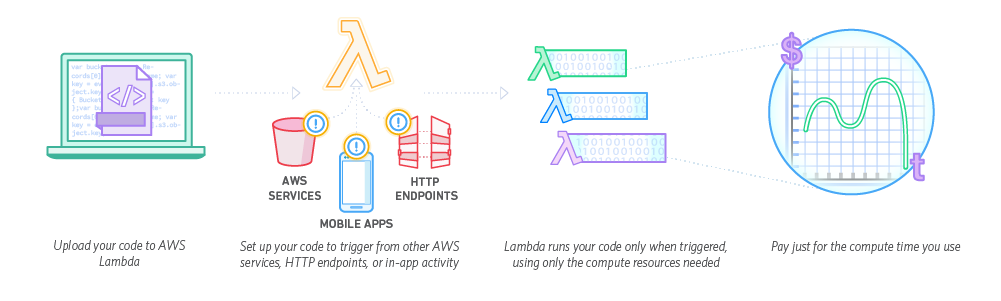

In [33]:
# Lambda - how it works
Image("../../raw_data/images/lambda_how_it_works.png", width=1200, height=800)

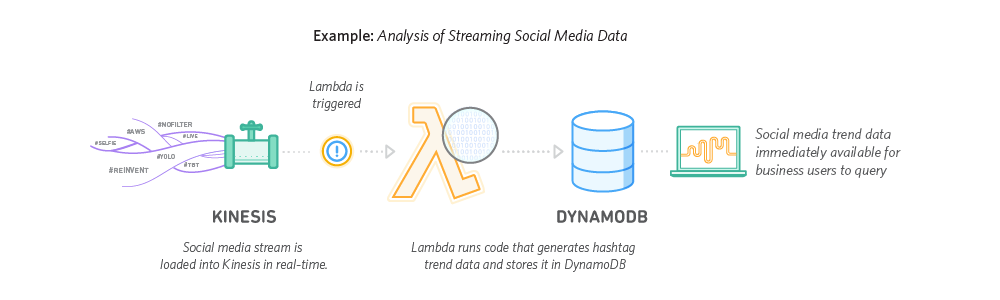

In [35]:
# Lambda example workflow
Image("../../raw_data/images/lambda_stream_processing.png", width=1200, height=800)

In [33]:
aws_lambda_url = 'https://docs.aws.amazon.com/lambda/latest/dg/python-programming-model-handler-types.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_lambda_url)
HTML(iframe)

In [34]:
# lambda function structure (pseudocode)
def handler_name(event, context): 
    ...
    return some_value

### Lambda Components
- **event** – AWS Lambda uses this parameter to pass in event data to the handler. This parameter is usually of the Python dict type. It can also be list, str, int, float, or NoneType type. 
- **context** – AWS Lambda uses this parameter to provide runtime information to your handler. This parameter is of the LambdaContext type.
- **return (optional)** - What happens to the returned value depends on the invocation type you use when invoking the Lambda function

##### event 
AWS Lambda uses this parameter to pass in event data to the handler. This parameter is usually of the Python dict type. It can also be list, str, int, float, or NoneType type. 

In [40]:
# Example Lambda using the event parameter
def my_handler(event, context):
    """ Welcome the user from the event """
    message = 'Hello {} {}!'.format(event['first_name'], event['last_name'])  
    
    return {'message' : message}

# create example data and execute the lambda
data = {'first_name':'Alex', 'last_name':'Sherman'}
my_handler(event=data, context=None)

{'message': 'Hello Alex Sherman!'}

##### context
AWS Lambda uses this parameter to provide runtime information to your handler. This parameter is of the LambdaContext type. While a Lambda function is executing, it can interact with the AWS Lambda service to get useful runtime information such as:

- How much time is remaining before AWS Lambda terminates your Lambda function (timeout is one of the Lambda function configuration properties).
- The CloudWatch log group and log stream associated with the Lambda function that is executing.
- The AWS request ID returned to the client that invoked the Lambda function. You can use the request ID for any follow up inquiry with AWS support.
- If the Lambda function is invoked through AWS Mobile SDK, you can learn more about the mobile application calling the Lambda function.

In [43]:
import time

def lambda_handler(event, context):
    # Add 1 second delay as code will execute quickly
    time.sleep(1) 
    print("Time remaining (MS):", context.get_remaining_time_in_millis())
    print("Log stream name:", context.log_stream_name)
    print("Log group name:",  context.log_group_name)
    print("Mem. limits(MB):", context.memory_limit_in_mb)

##### return (optional)
What happens to the returned value depends on the invocation type you use when invoking the Lambda function: 

- If you use the RequestResponse invocation type (synchronous execution), AWS Lambda returns the result of the Python function call to the client invoking the Lambda function (in the HTTP response to the invocation request, serialized into JSON). For example, AWS Lambda console uses the RequestResponse invocation type, so when you invoke the function using the console, the console will display the returned value. 
- If the handler returns NONE, AWS Lambda returns null. 
- If you use the Event invocation type (asynchronous execution), the value is discarded. 

In [35]:
# example lambda return and logging output
def lambda_handler(event, context):
    print('this will also show up in cloud watch')
    return 'Hello World!'   

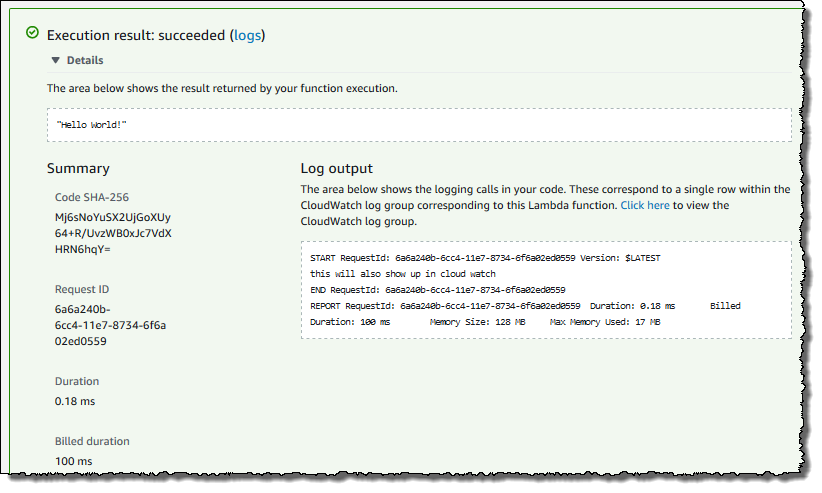

In [15]:
# example RequestResponse invocation type (synchronous execution)
Image("../../raw_data/images/lambda_logging.png", width=800, height=400)

##### review our python lambda script to automate downloading the annual reports

In [36]:
less lambda_exercise_1/lambda.py

##### Upload Lambda function to AWS

1. Create a directory for the lambda (this can have any name of your choosing)
2. Save the python file into the lambda dir (e.g. lambda.py)
3. Install necessary packages into lambda_exercise directory
    - pip install requests beautifulsoup4 -t lambda_exercise_1/
4. Package the file and any dependencies into a .zip file. When creating the zip, include only the code and its dependencies, not the containing folder.
5. Upload the .zip file using either the console or AWS CLI to create a Lambda function. You specify the function name in the Python code to be used as the handler when you create a Lambda function. 

### IAM Policies

Many AWS services require that you use roles to control what that service can access. A role that a service assumes to perform actions on your behalf is called a service role. When a role serves a specialized purpose for a service, it is categorized as a service role for EC2 instances (for example), or a service-linked role. To see what services support using service-linked roles, or whether a service supports any form of temporary credentials, see AWS Services That Work with IAM. To learn how an individual service uses roles, choose the service name in the table to view the documentation for that service.

SOURCE: https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_create_for-service.html?icmpid=docs_iam_console

In [37]:
aws_iam_url = 'https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_create_for-service.html?icmpid=docs_iam_console'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_iam_url)
HTML(iframe)

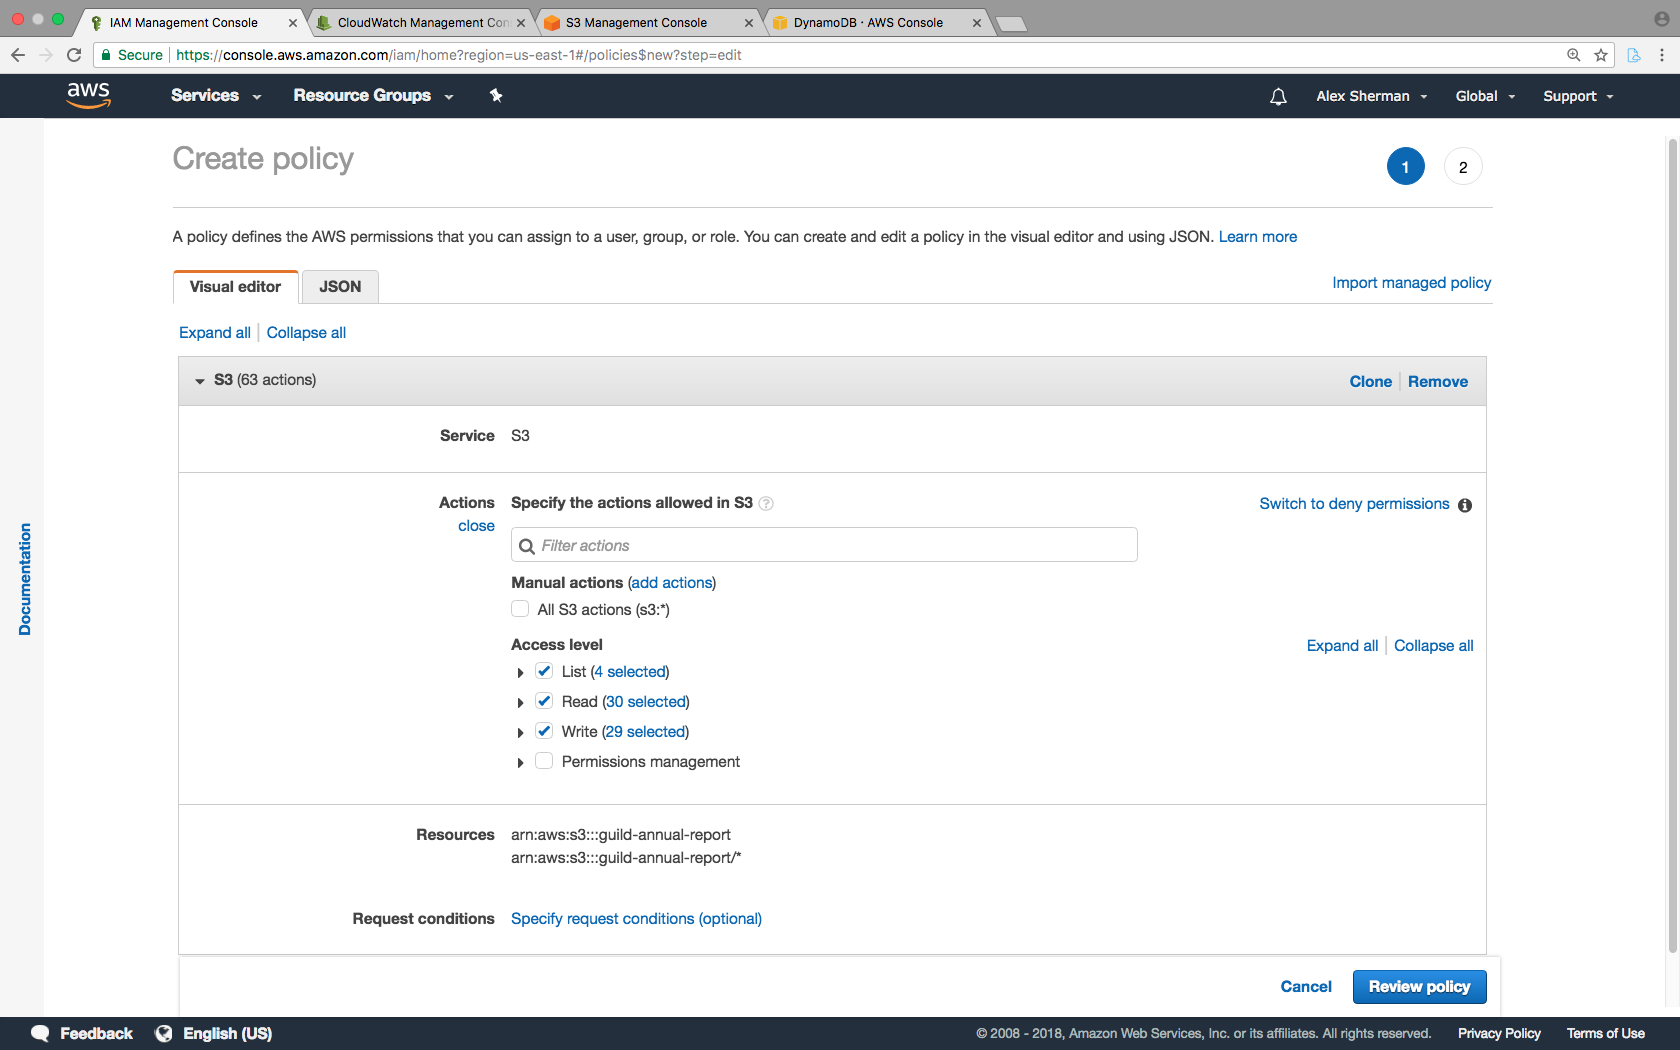

In [38]:
# AWS create policies
Image("../../raw_data/images/AWS_policies.png", width=800, height=400)

### AWS Roles

AM roles allow you to delegate access to users or services that normally don't have access to your organization's AWS resources. IAM users or AWS services can assume a role to obtain temporary security credentials that can be used to make AWS API calls. Consequently, you don't have to share long-term credentials or define permissions for each entity that requires access to a resource.

##### The following scenarios highlight some of the challenges that you can address by delegating access
- **Granting applications that run on Amazon EC2 instances access to AWS resources:** To grant applications on an Amazon EC2 instance access to AWS resources, developers might distribute their credentials to each instance. Applications can then use those credentials to access resources such as Amazon S3 buckets or Amazon DynamoDB data. However, distributing long-term credentials to each instance is challenging to manage and a potential security risk.
- **Granting permissions to AWS services:** Before AWS services can perform actions for you, you must grant them permissions to do so. You can use AWS IAM roles to grant permissions for AWS services to call other AWS services on your behalf, or create and manage AWS resources for you in your account.

##### Execution Role

The execution role defines which AWS resources your function is allowed to access.

##### Function Policy
The function policy defines which AWS resources are allowed to invoke your function.

In [28]:
# default lambda_basic_execution role
{
  "roleName": "lambda_basic_execution",
  "policies": [
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Effect": "Allow",
            "Action": [
              "logs:CreateLogGroup",
              "logs:CreateLogStream",
              "logs:PutLogEvents"
            ],
            "Resource": "arn:aws:logs:*:*:*"
          }
        ]
      },
      "name": "oneClick_lambda_basic_execution_1506433762285",
      "type": "inline"
    },
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Action": [
              "dynamodb:*",
              "dax:*",
              "application-autoscaling:DeleteScalingPolicy",
              "application-autoscaling:DeregisterScalableTarget",
              "application-autoscaling:DescribeScalableTargets",
              "application-autoscaling:DescribeScalingActivities",
              "application-autoscaling:DescribeScalingPolicies",
              "application-autoscaling:PutScalingPolicy",
              "application-autoscaling:RegisterScalableTarget",
              "cloudwatch:DeleteAlarms",
              "cloudwatch:DescribeAlarmHistory",
              "cloudwatch:DescribeAlarms",
              "cloudwatch:DescribeAlarmsForMetric",
              "cloudwatch:GetMetricStatistics",
              "cloudwatch:ListMetrics",
              "cloudwatch:PutMetricAlarm",
              "datapipeline:ActivatePipeline",
              "datapipeline:CreatePipeline",
              "datapipeline:DeletePipeline",
              "datapipeline:DescribeObjects",
              "datapipeline:DescribePipelines",
              "datapipeline:GetPipelineDefinition",
              "datapipeline:ListPipelines",
              "datapipeline:PutPipelineDefinition",
              "datapipeline:QueryObjects",
              "ec2:DescribeVpcs",
              "ec2:DescribeSubnets",
              "ec2:DescribeSecurityGroups",
              "iam:GetRole",
              "iam:ListRoles",
              "sns:CreateTopic",
              "sns:DeleteTopic",
              "sns:ListSubscriptions",
              "sns:ListSubscriptionsByTopic",
              "sns:ListTopics",
              "sns:Subscribe",
              "sns:Unsubscribe",
              "sns:SetTopicAttributes",
              "lambda:CreateFunction",
              "lambda:ListFunctions",
              "lambda:ListEventSourceMappings",
              "lambda:CreateEventSourceMapping",
              "lambda:DeleteEventSourceMapping",
              "lambda:GetFunctionConfiguration",
              "lambda:DeleteFunction"
            ],
            "Effect": "Allow",
            "Resource": "*"
          },
          {
            "Action": [
              "iam:PassRole"
            ],
            "Effect": "Allow",
            "Resource": "*",
            "Condition": {
              "StringLike": {
                "iam:PassedToService": [
                  "application-autoscaling.amazonaws.com",
                  "dax.amazonaws.com"
                ]
              }
            }
          },
          {
            "Effect": "Allow",
            "Action": [
              "iam:CreateServiceLinkedRole"
            ],
            "Resource": "*",
            "Condition": {
              "StringEquals": {
                "iam:AWSServiceName": [
                  "replication.dynamodb.amazonaws.com",
                  "dax.amazonaws.com",
                  "dynamodb.application-autoscaling.amazonaws.com"
                ]
              }
            }
          }
        ]
      },
      "name": "AmazonDynamoDBFullAccess",
      "id": "ANPAINUGF2JSOSUY76KYA",
      "type": "managed",
      "arn": "arn:aws:iam::aws:policy/AmazonDynamoDBFullAccess"
    },
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Effect": "Allow",
            "Action": [
              "iot:*"
            ],
            "Resource": "*"
          }
        ]
      },
      "name": "AWSIoTFullAccess",
      "id": "ANPAJU2FPGG6PQWN72V2G",
      "type": "managed",
      "arn": "arn:aws:iam::aws:policy/AWSIoTFullAccess"
    }
  ]
}

{'policies': [{'document': {'Statement': [{'Action': ['logs:CreateLogGroup',
       'logs:CreateLogStream',
       'logs:PutLogEvents'],
      'Effect': 'Allow',
      'Resource': 'arn:aws:logs:*:*:*'}],
    'Version': '2012-10-17'},
   'name': 'oneClick_lambda_basic_execution_1506433762285',
   'type': 'inline'},
  {'arn': 'arn:aws:iam::aws:policy/AmazonDynamoDBFullAccess',
   'document': {'Statement': [{'Action': ['dynamodb:*',
       'dax:*',
       'application-autoscaling:DeleteScalingPolicy',
       'application-autoscaling:DeregisterScalableTarget',
       'application-autoscaling:DescribeScalableTargets',
       'application-autoscaling:DescribeScalingActivities',
       'application-autoscaling:DescribeScalingPolicies',
       'application-autoscaling:PutScalingPolicy',
       'application-autoscaling:RegisterScalableTarget',
       'cloudwatch:DeleteAlarms',
       'cloudwatch:DescribeAlarmHistory',
       'cloudwatch:DescribeAlarms',
       'cloudwatch:DescribeAlarmsForMetri

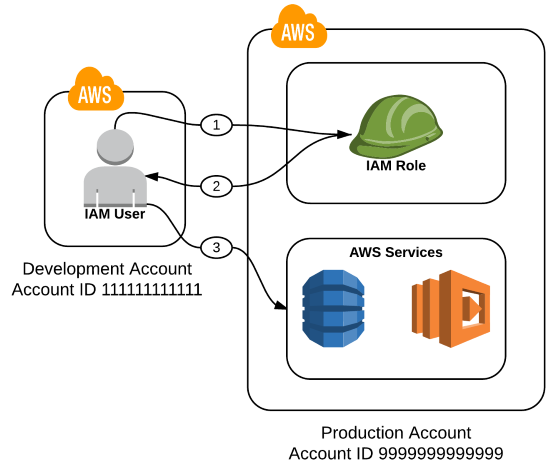

In [39]:
# AWS create role
Image("../../raw_data/images/AWS_role_diagram.png", width=500, height=400)

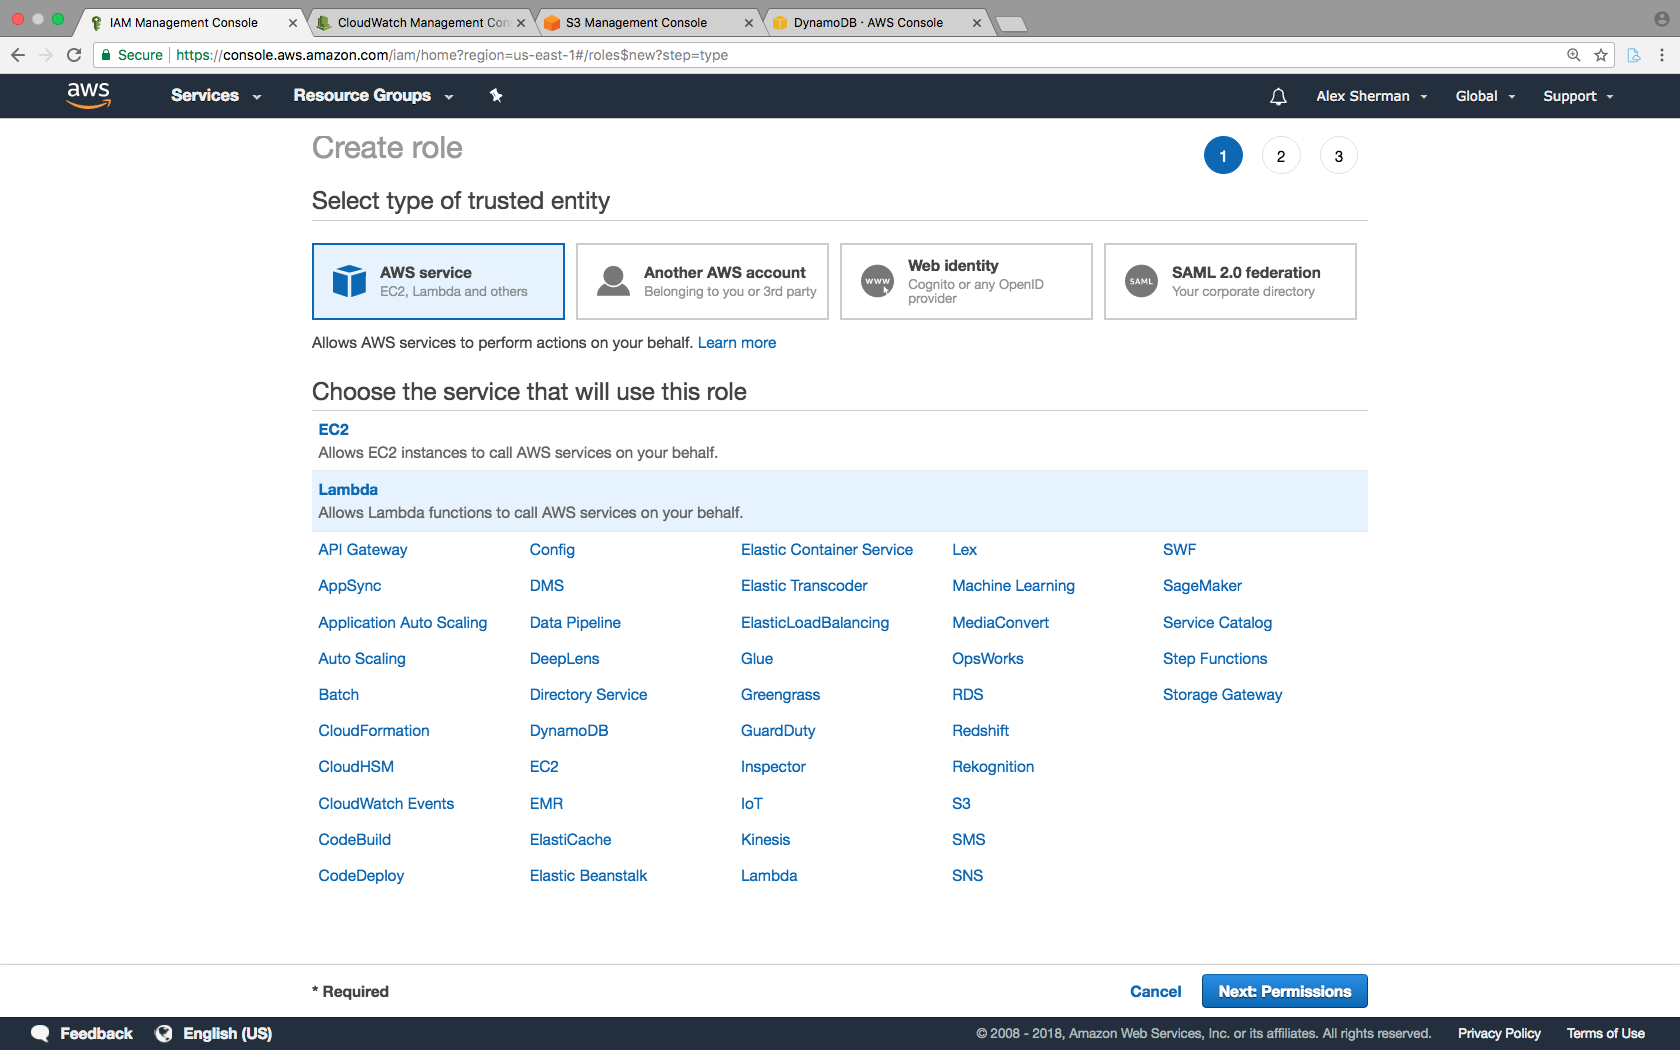

In [40]:
# AWS create role
Image("../../raw_data/images/AWS_create_role.png", width=800, height=400)

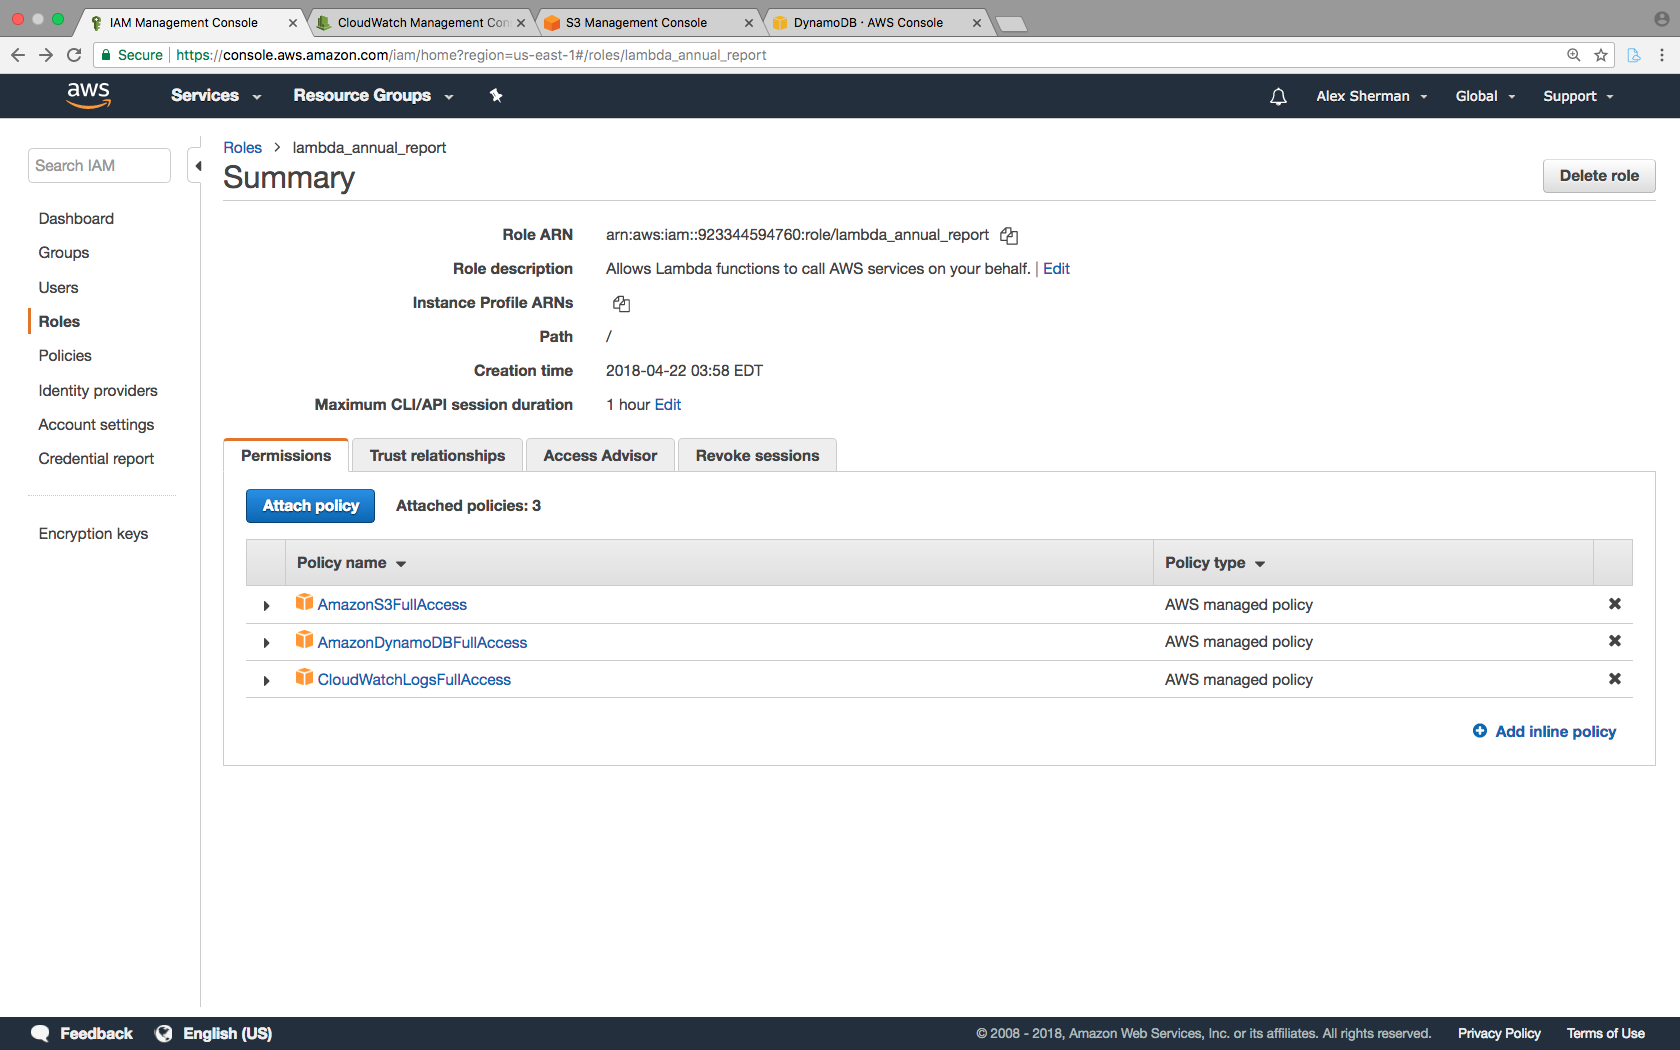

In [41]:
# AWS role summary
Image("../../raw_data/images/AWS_role_summary.png", width=800, height=400)

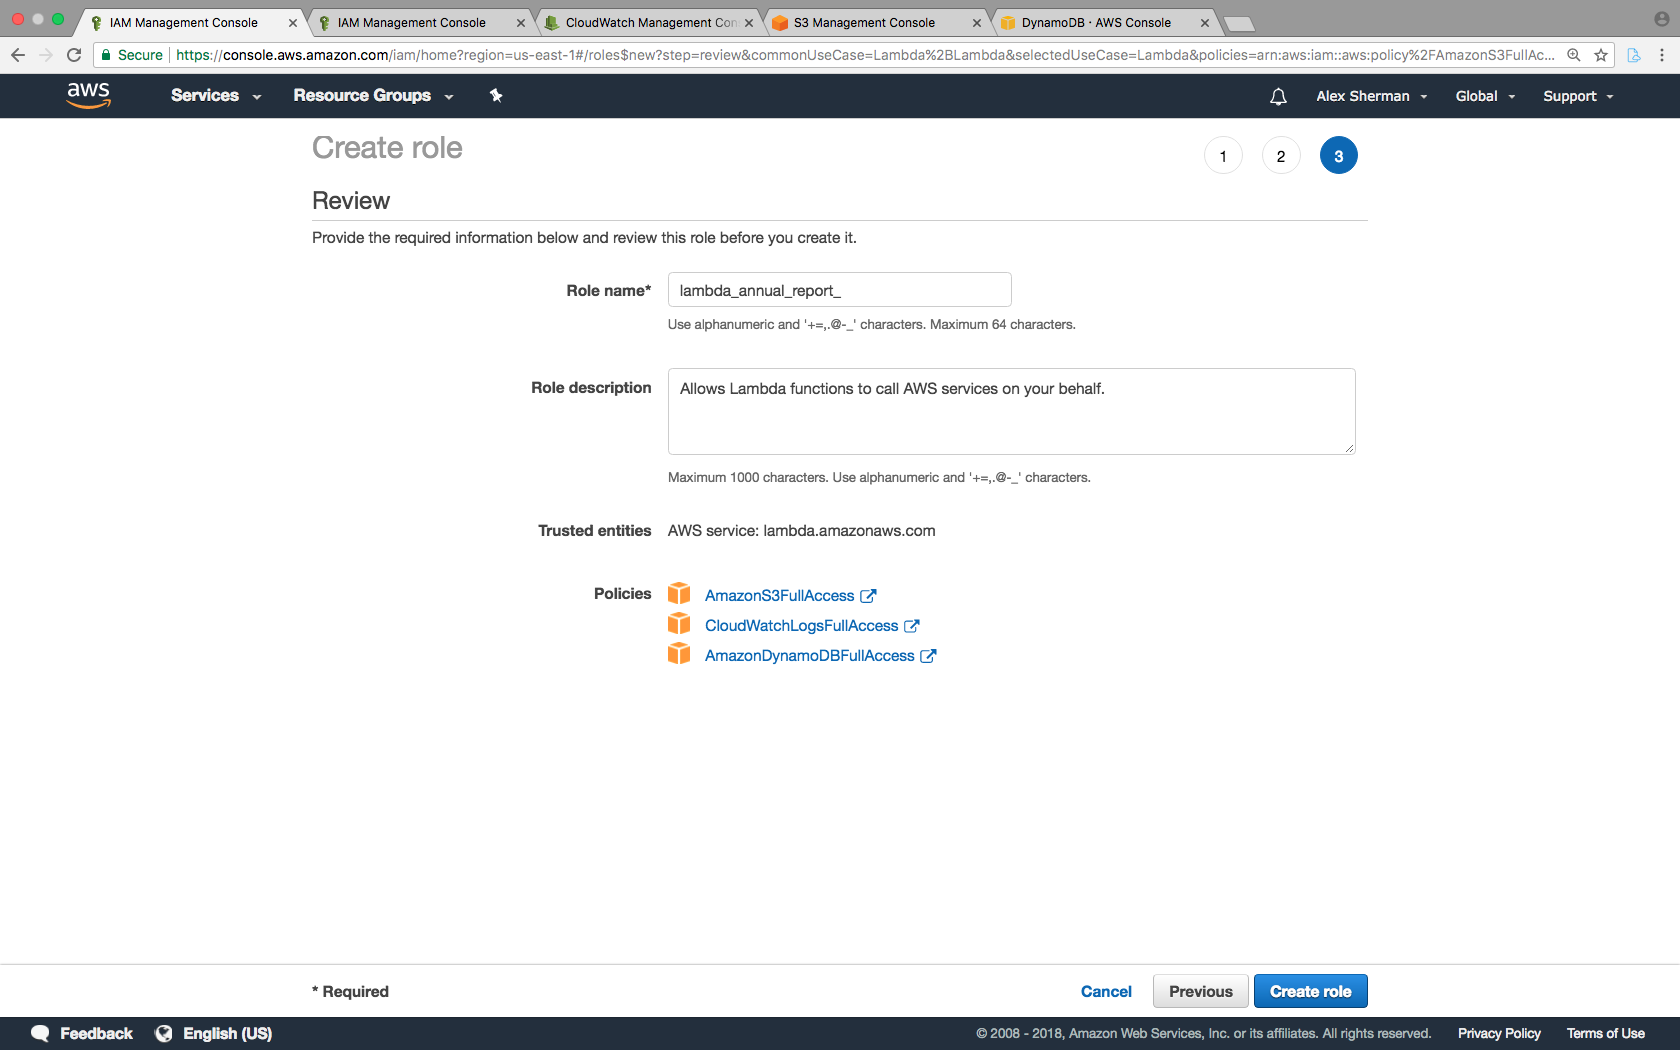

In [42]:
# AWS create role
Image("../../raw_data/images/AWS_role.png", width=800, height=400)

### CloudWatch

Amazon CloudWatch is a monitoring service for AWS cloud resources and the applications you run on AWS. You can use Amazon CloudWatch to collect and track metrics, collect and monitor log files, set alarms, and automatically react to changes in your AWS resources. Amazon CloudWatch can monitor AWS resources such as Amazon EC2 instances, Amazon DynamoDB tables, and Amazon RDS DB instances, as well as custom metrics generated by your applications and services, and any log files your applications generate. You can use Amazon CloudWatch to gain system-wide visibility into resource utilization, application performance, and operational health. You can use these insights to react and keep your application running smoothly.

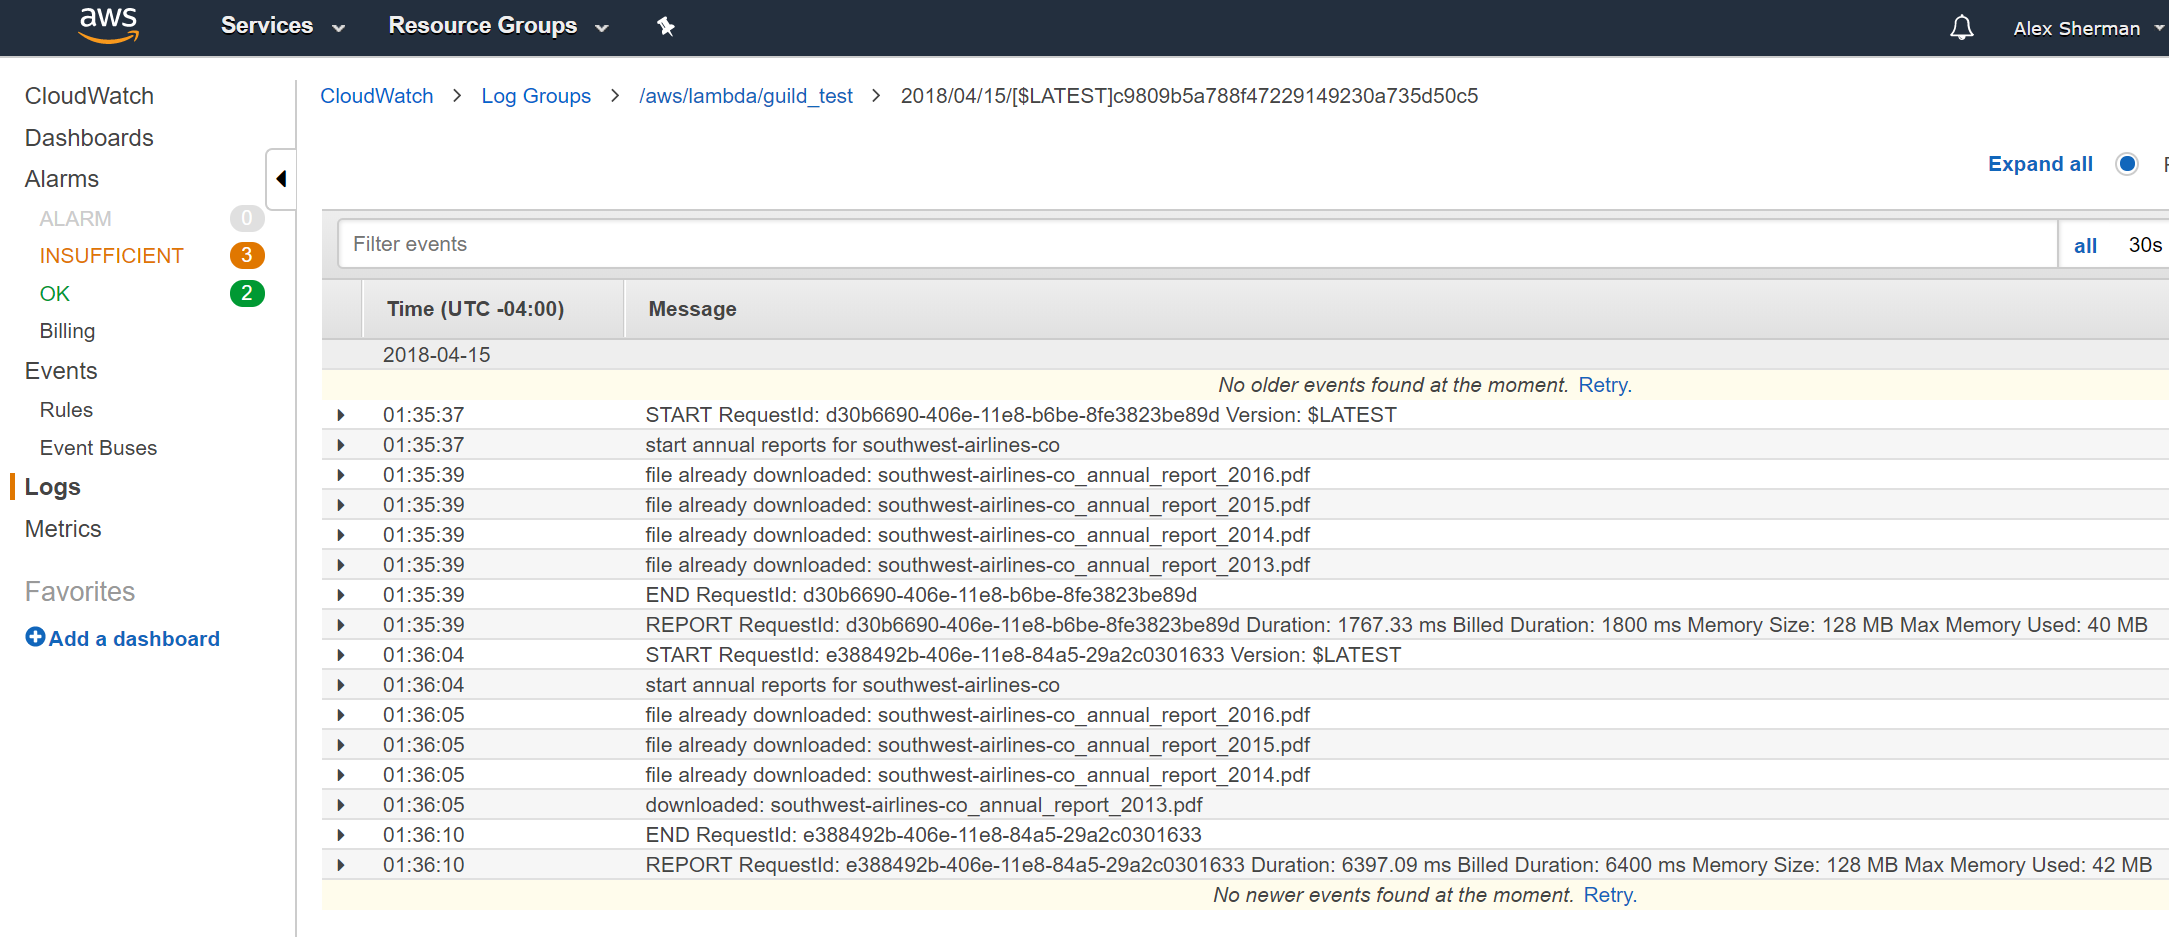

In [30]:
# example CloudWatch logs
Image("../../raw_data/images/aws_cloudwatch.png", width=800, height=400)

##### CloudWatch Events

You can also use CloudWatch Events to schedule automated actions that self-trigger at certain times using cron or rate expressions. For more information, see Schedule Expressions for Rules.

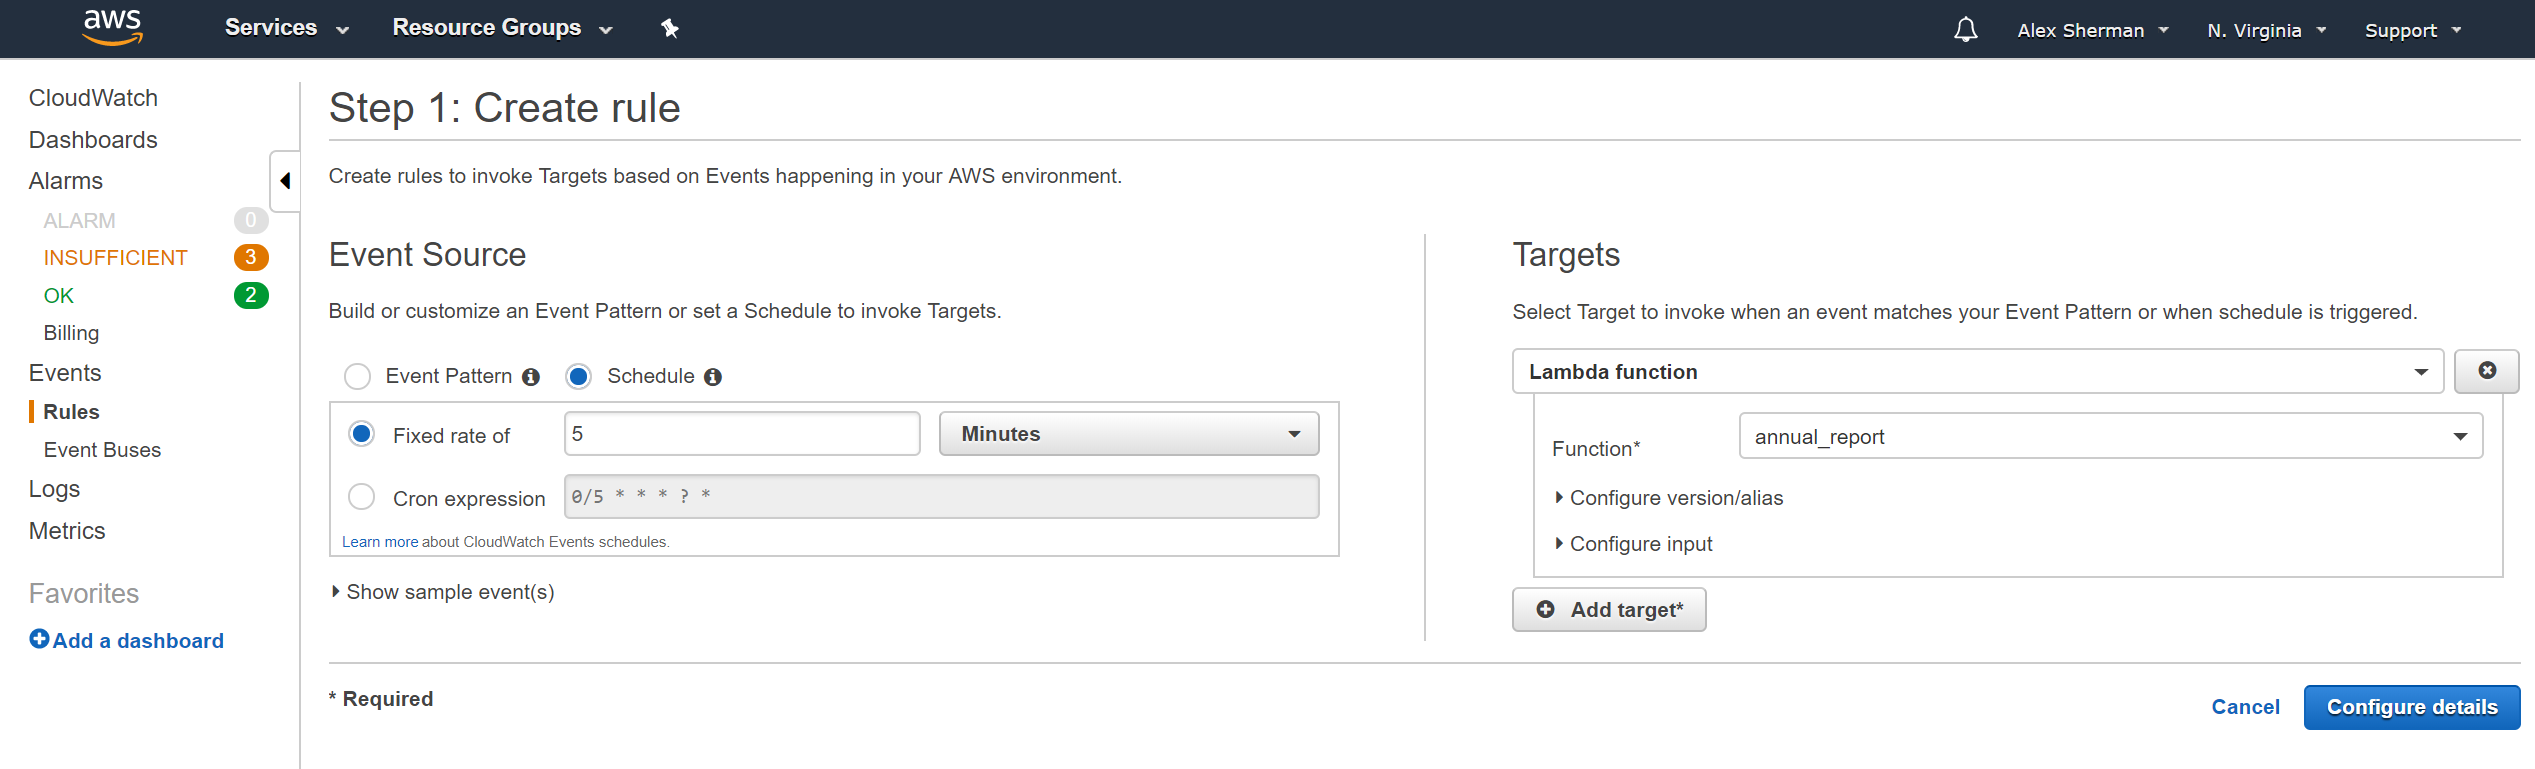

In [35]:
# example CloudWatch Event
Image("../../raw_data/images/aws_cloudwatch_event.png", width=800, height=400)

### Lambda data processing use case

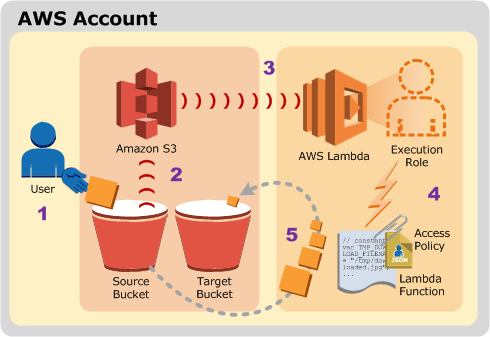

In [52]:
# lambda data processing use case
Image("../../raw_data/images/lambda_use_case_2.png", width=600, height=800)

### Dynamodb

Amazon DynamoDB is a fast and flexible NoSQL database service for all applications that need consistent, single-digit millisecond latency at any scale. It is a fully managed cloud database and supports both document and key-value store models. Its flexible data model, reliable performance, and automatic scaling of throughput capacity make it a great fit for mobile, web, gaming, ad tech, IoT, and many other applications.

In [43]:
# DynamoDB boto3 documentations
aws_dynamodb_url = 'http://boto3.readthedocs.io/en/latest/guide/dynamodb.html'
iframe = '<iframe src={} width=900 height=300></iframe>'.format(aws_dynamodb_url)
HTML(iframe)

In [50]:
import boto3

# Get the service resource
dynamodb = boto3.resource('dynamodb')

# Create the DynamoDB table
table = dynamodb.create_table(
    TableName='annual_report',
    KeySchema=[
        {
            'AttributeName': 'document_name',
            'KeyType': 'HASH'
        }
    ],
    AttributeDefinitions=[
        {
            'AttributeName': 'document_name',
            'AttributeType': 'S'
        },

    ],
    ProvisionedThroughput={
        'ReadCapacityUnits': 5,
        'WriteCapacityUnits': 5
    }
)

# Wait until the table exists
table.meta.client.get_waiter('table_exists').wait(TableName='annual_report')

# Print out some data about the table
print(table.item_count)

0


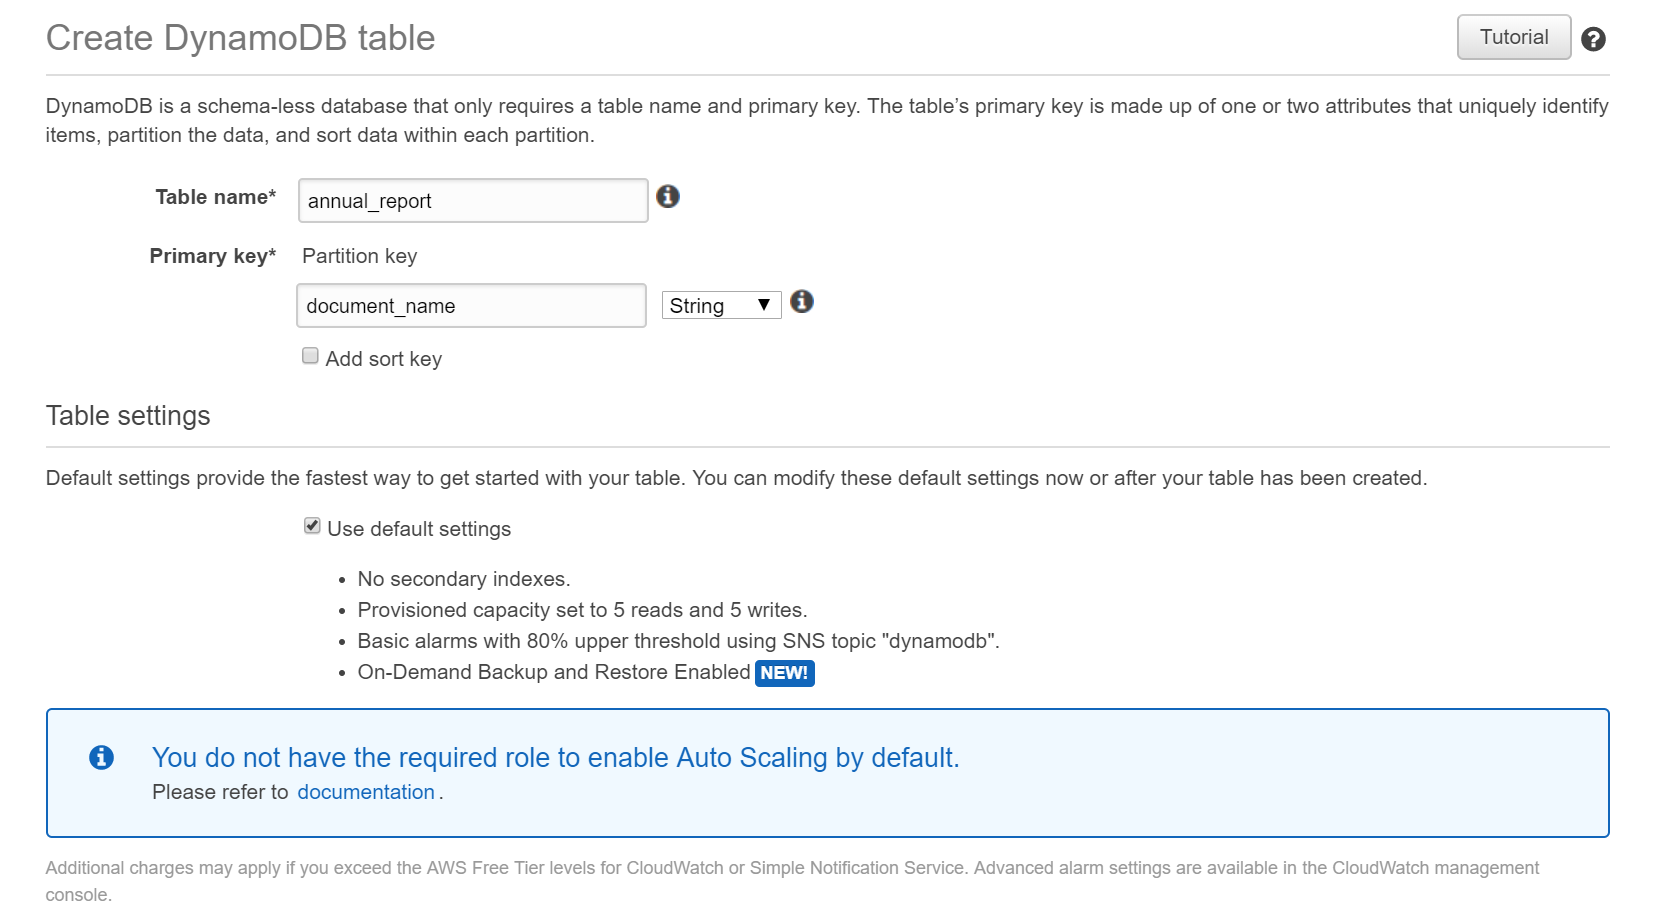

In [55]:
# DynamoDB UI to create a table
Image("../../raw_data/images/dynamodb.png", width=800, height=400)

In [56]:
# DynamoDB create table documentation
aws_dynamodb_create_url = 'https://docs.aws.amazon.com/amazondynamodb/latest/APIReference/API_CreateTable.html'
iframe = '<iframe src={} width=900 height=300></iframe>'.format(aws_dynamodb_create_url)
HTML(iframe)

In [58]:
import boto3

# Get the service resource
dynamodb = boto3.resource('dynamodb')

# Instantiate an existing DynamoDB table
table = dynamodb.Table('annual_report')

# insert a record into the table
table.put_item(
   Item={
        'document_name': 'Southwest_Airlines_2018',
        'document_text': 'example text from Southwest Airlines annual report',
    }
)

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '2',
   'content-type': 'application/x-amz-json-1.0',
   'date': 'Wed, 25 Apr 2018 19:30:00 GMT',
   'server': 'Server',
   'x-amz-crc32': '2745614147',
   'x-amzn-requestid': 'QOTERJCTH7UADSNNF44GUVN9DJVV4KQNSO5AEMVJF66Q9ASUAAJG'},
  'HTTPStatusCode': 200,
  'RequestId': 'QOTERJCTH7UADSNNF44GUVN9DJVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'RetryAttempts': 0}}

In [59]:
response = table.get_item(
    Key={
        'document_name': 'Southwest_Airlines_2018'
    }
)
item = response['Item']
print(item)

{'document_name': 'Southwest_Airlines_2018', 'document_text': 'example text from Southwest Airlines annual report'}


In [49]:
# uncomment below to delete a DynamoDB table
#table.delete()

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '328',
   'content-type': 'application/x-amz-json-1.0',
   'date': 'Wed, 25 Apr 2018 06:21:35 GMT',
   'server': 'Server',
   'x-amz-crc32': '3864485705',
   'x-amzn-requestid': 'Q2SVPGGBGNEA3C62HM6AISL6KNVV4KQNSO5AEMVJF66Q9ASUAAJG'},
  'HTTPStatusCode': 200,
  'RequestId': 'Q2SVPGGBGNEA3C62HM6AISL6KNVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'RetryAttempts': 0},
 'TableDescription': {'ItemCount': 0,
  'ProvisionedThroughput': {'NumberOfDecreasesToday': 0,
   'ReadCapacityUnits': 5,
   'WriteCapacityUnits': 5},
  'TableArn': 'arn:aws:dynamodb:us-east-1:923344594760:table/annual_report',
  'TableId': '4cb2ed6f-7e2a-40d6-a4fc-579704f57f8b',
  'TableName': 'annual_report',
  'TableSizeBytes': 0,
  'TableStatus': 'DELETING'}}

### Lambda extract_document instructions:
- pip install PyPDF2 -t lambda_solution_2/

In [60]:
# lambda to extract the text from the pdf annual reports loaded to S3

import os
import boto3
import PyPDF2


def lambda_handler(event, context):

    # get document_name for S3 event record
    document_name = event['Records'][0]['s3']['object']['key']
    download_path = '/tmp/{}'.format(document_name)

    # download document to tmp
    s3 = boto3.resource('s3')
    bucket = s3.Bucket('guild-annual-report')
    bucket.download_file(document_name, download_path)
    
    print('start processing: {}'.format(document_name))
    
    # extract document text
    text = []
    pdfFileObj = open(download_path, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    for page_num in range(0,5):  # limit to 5 pages for testing
        pageObj = pdfReader.getPage(page_num)
        page_text = pageObj.extractText()
        text.append(page_text)
    all_text = ' '.join(text)

    print('complete processing: {}'.format(document_name))

    # connect to dynamodb table
    dynamodb = boto3.resource('dynamodb')
    table = dynamodb.Table('annual_report')
    
    # insert a record into the table
    table.put_item(
       Item={
            'document_name': document_name,
            'document_text': all_text[0:250],  # limit text during testing
        }
    )
    print('inserted text for: {}'.format(document_name))

### Lambda Tests

In [2]:
event = {
  "Records": [
    {
      "eventVersion": "2.0",
      "eventTime": "1970-01-01T00:00:00.000Z",
      "requestParameters": {
        "sourceIPAddress": "127.0.0.1"
      },
      "s3": {
        "configurationId": "testConfigRule",
        "object": {
          "eTag": "0123456789abcdef0123456789abcdef",
          "sequencer": "0A1B2C3D4E5F678901",
          "key": "southwest-airlines-co_annual_report_2015.pdf",
          "size": 1024
        },
        "bucket": {
          "arn": "arn:aws:s3:::guild-annual-report",
          "name": "sourcebucket",
          "ownerIdentity": {
            "principalId": "EXAMPLE"
          }
        },
        "s3SchemaVersion": "1.0"
      },
      "responseElements": {
        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH",
        "x-amz-request-id": "EXAMPLE123456789"
      },
      "awsRegion": "us-east-1",
      "eventName": "ObjectCreated:Put",
      "userIdentity": {
        "principalId": "EXAMPLE"
      },
      "eventSource": "aws:s3"
    }
  ]
}

In [60]:
document_name = event['Records'][0]['s3']['object']['key']
document_name

'southwest-airlines-co_annual_report_2013.pdf'

### Lambda Triggers - Notify Lambda via events on S3

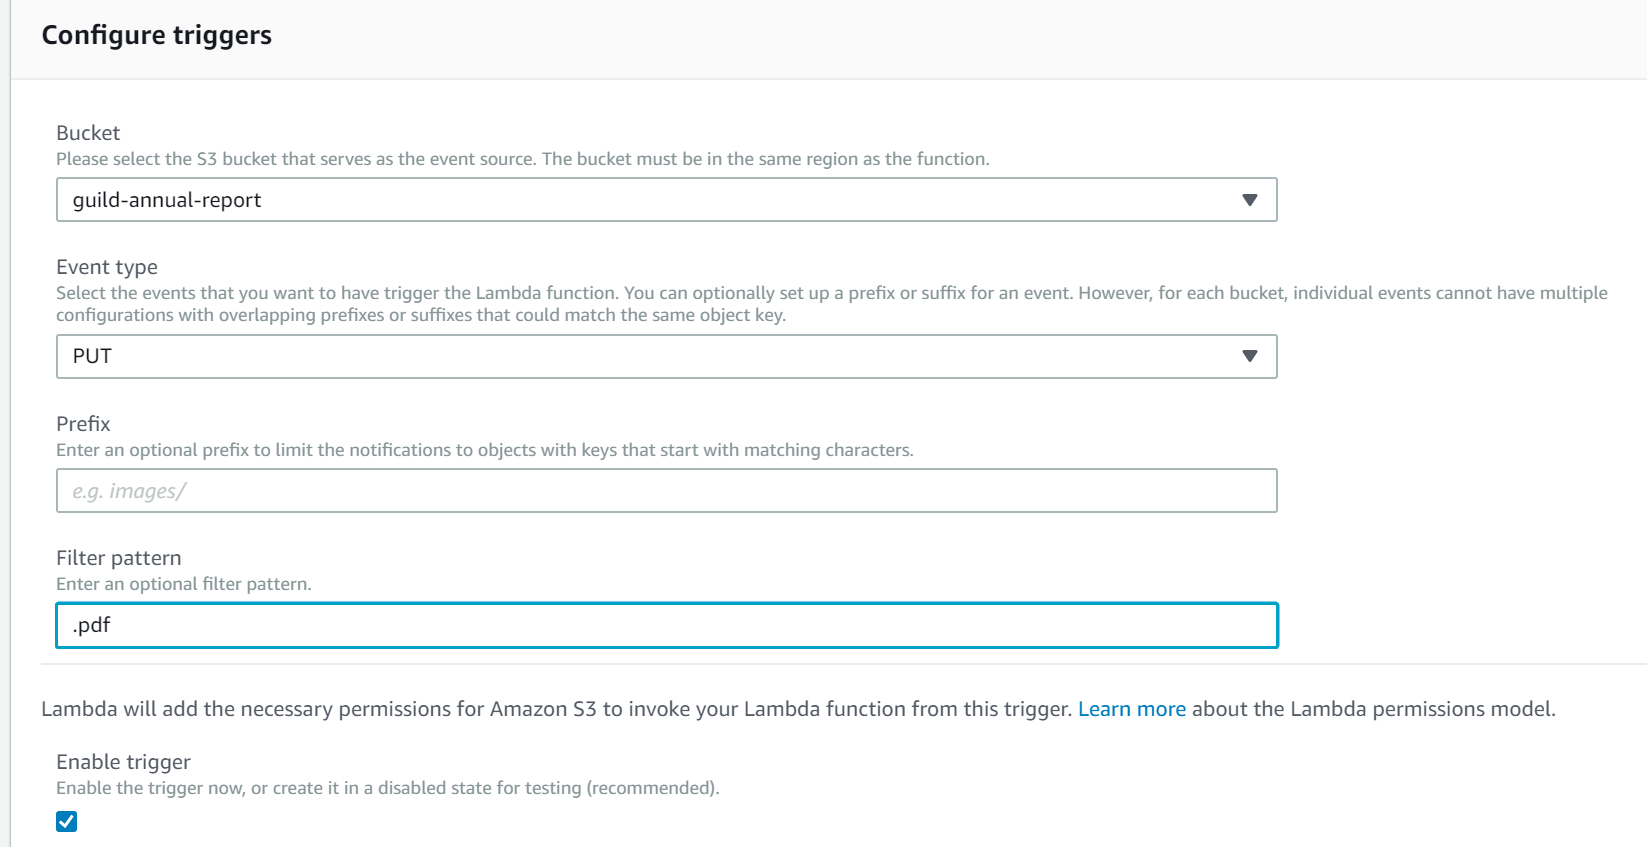

In [50]:
# Lambda S3 trigger
Image("../../raw_data/images/lambda_trigger.png", width=800, height=400)

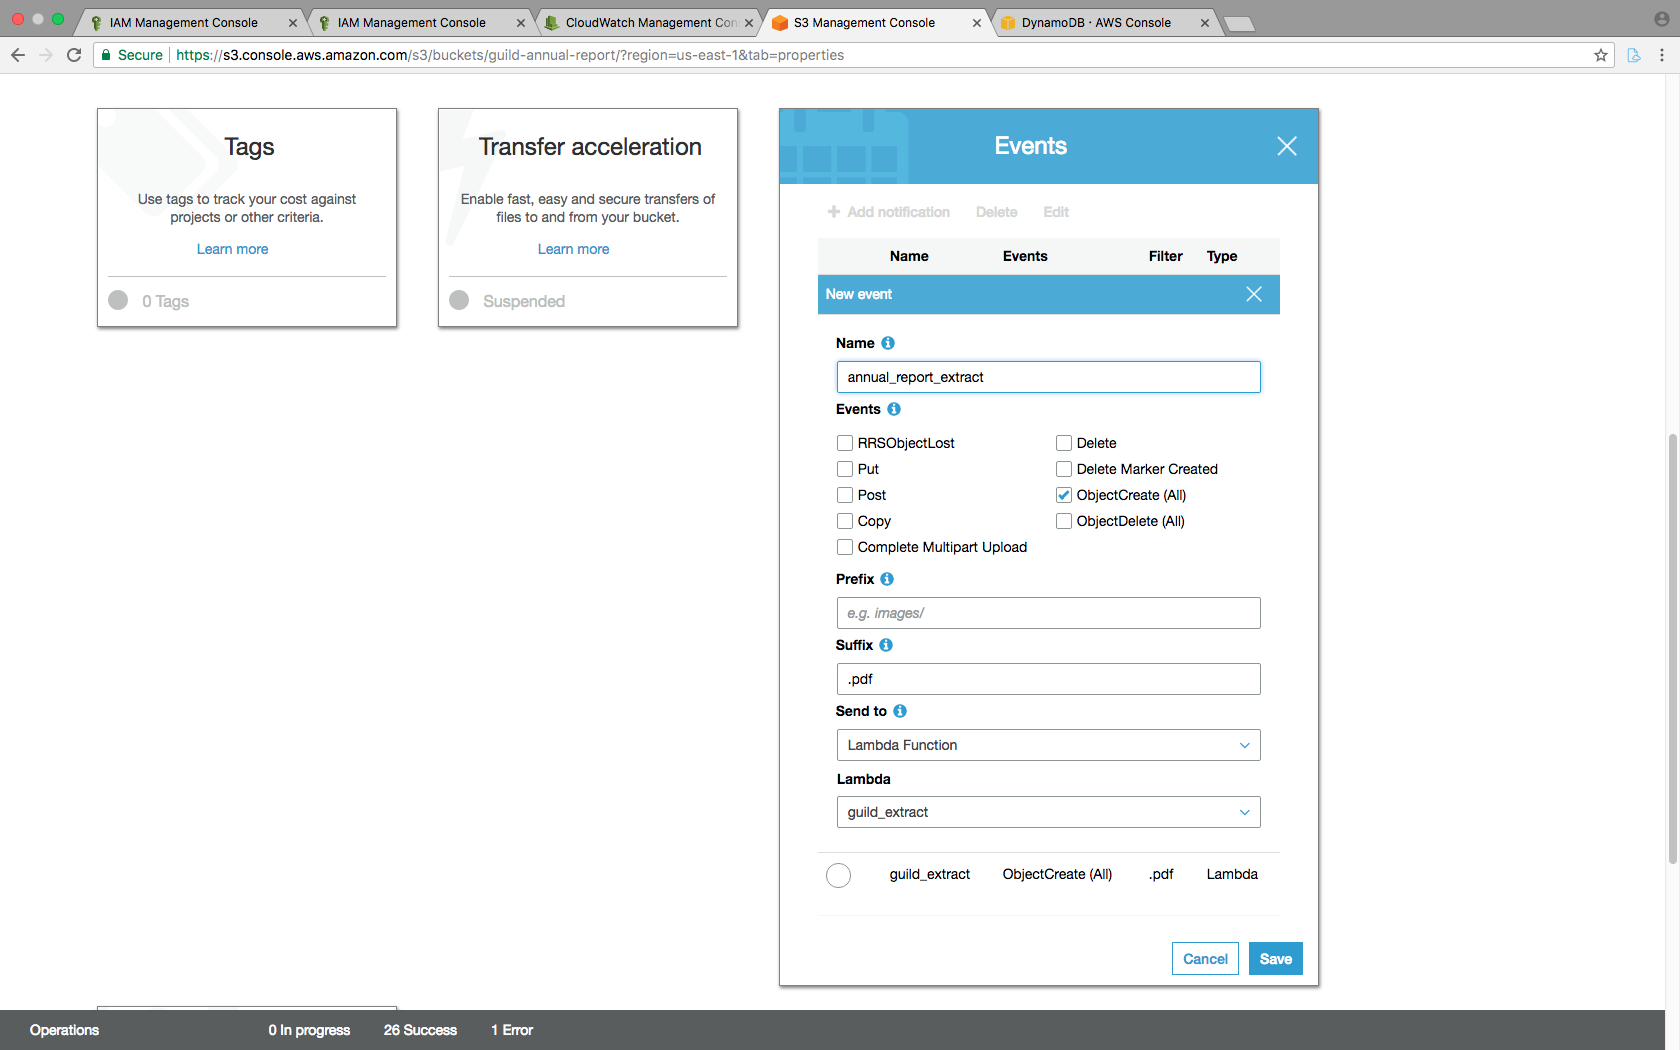

In [61]:
# Set event from S3
Image("../../raw_data/images/S3_event.png", width=800, height=400)

### Amazon API Gateway 

API Gateway is a fully managed service that makes it easy for developers to create, publish, maintain, monitor, and secure APIs at any scale. With a few clicks in the AWS Management Console, you can create an API that acts as a “front door” for applications to access data, business logic, or functionality from your back-end services, such as workloads running on Amazon Elastic Compute Cloud (Amazon EC2), code running on AWS Lambda, or any web application.

Amazon API Gateway handles all the tasks involved in accepting and processing up to hundreds of thousands of concurrent API calls, including traffic management, authorization and access control, monitoring, and API version management. Amazon API Gateway has no minimum fees or startup costs. You pay only for the API calls you receive and the amount of data transferred out.

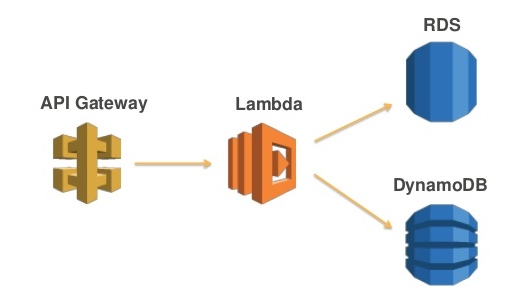

In [63]:
# Set event from S3
Image("../../raw_data/images/api_gateway.jpg", width=400, height=400)

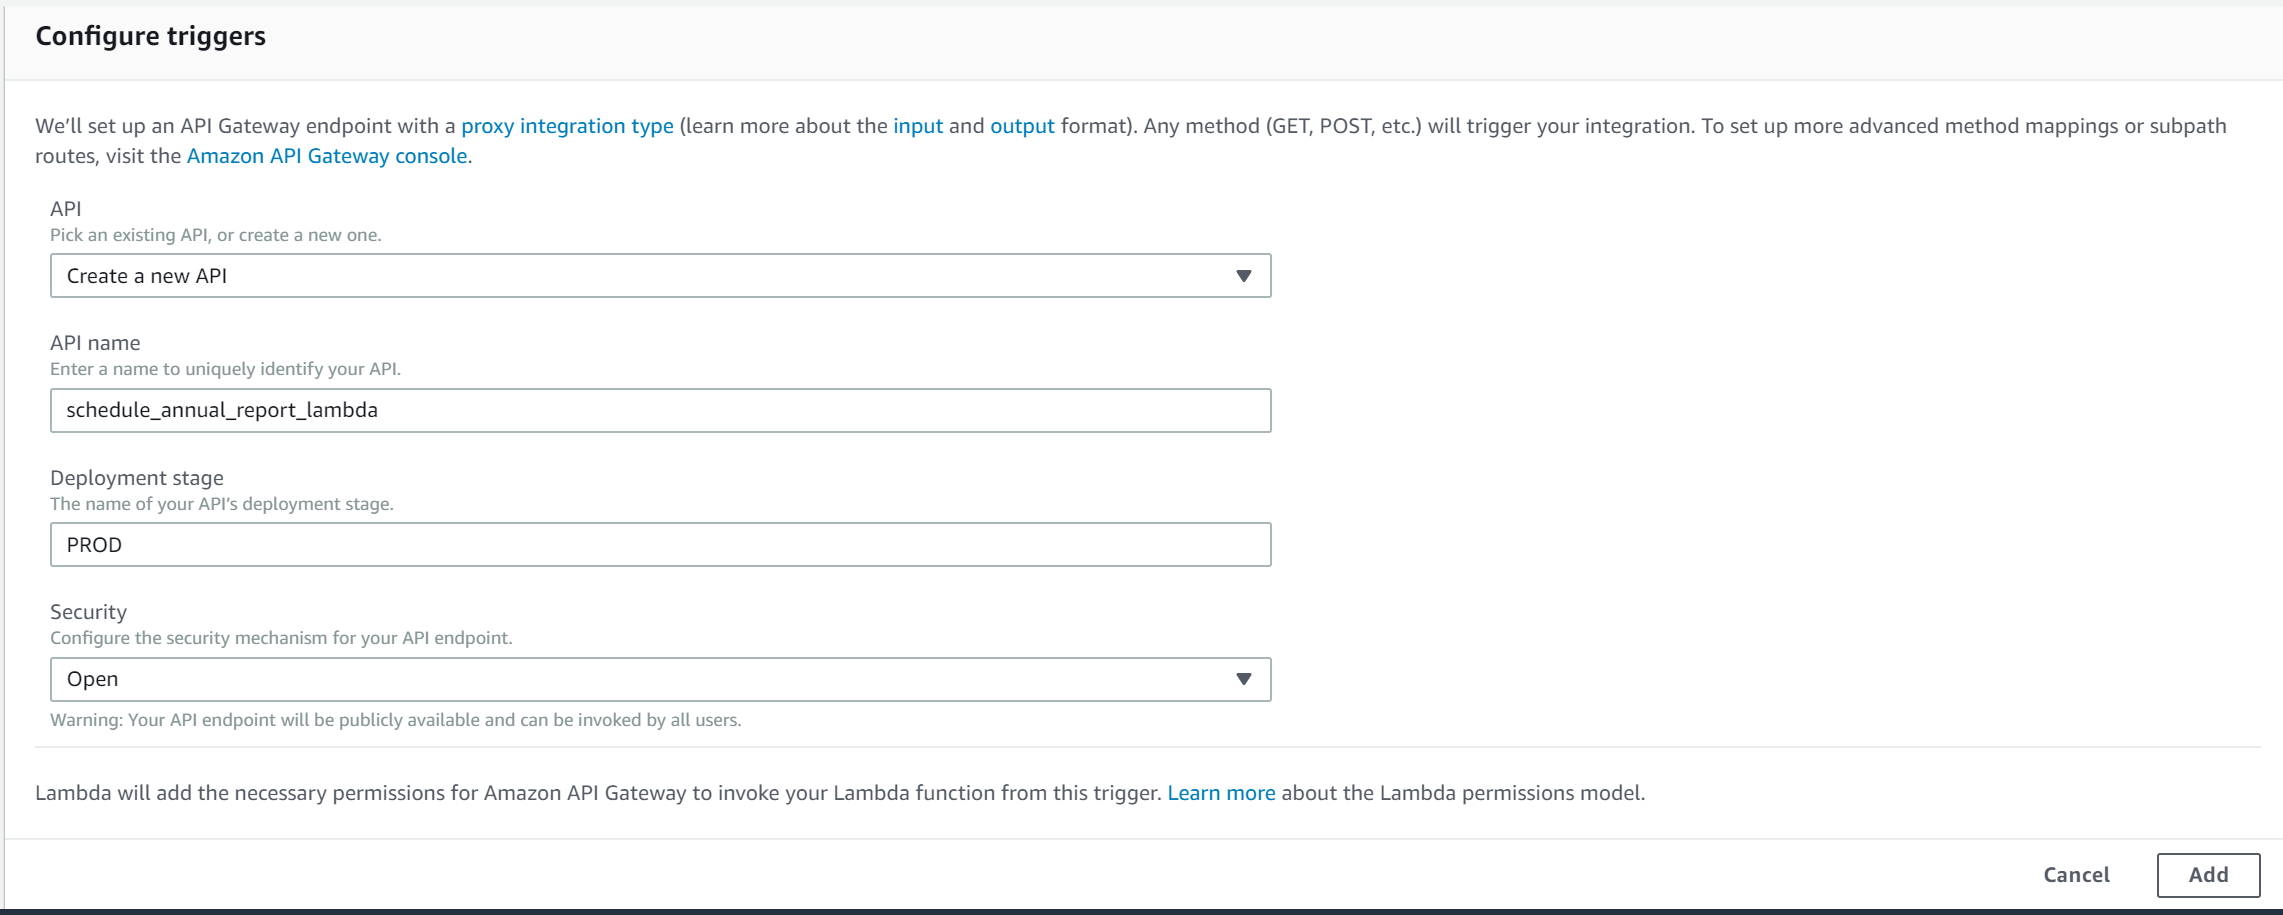

In [65]:
# Set event from S3
Image("../../raw_data/images/api_gateway_trigger.png", width=800, height=400)